<a href="https://colab.research.google.com/github/Swamy612/Supervised-Learning/blob/main/SUPPORT_VECTOR_MACHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset - https://drive.google.com/file/d/1yRJRI1rSkvm4QrHfR_4I4kdCPlc1114B/view?usp=drive_link

In [ ]:
# Librareis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # support vector classifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, roc_auc_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# formating the notebook
pd.set_option('display.max_columns', None)

In [ ]:
# Import data
data = pd.read_csv('/content/drive/MyDrive/voice.csv')

# data dimension
data.shape

(3168, 21)

In [ ]:
# data sample
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
# Analyse the taget column
data['label'].value_counts()

,count
label,
male,1584
female,1584


In [ ]:
# Dependent and Independent
x = data.iloc[:, :-1]
y = data['label']

# encoding the target
y = y.map({'male': 0, 'female': 1})

# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# dimension of the split
print('Training data shape:', x_train.shape, y_train.shape)
print('Testing data shape:', x_test.shape, y_test.shape)

Training data shape: (2534, 20) (2534,)
Testing data shape: (634, 20) (634,)


In [ ]:
# feature scaling
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
# train the svc with default parameters
svc_default = SVC(random_state=42)
svc_default.fit(x_train_scaled, y_train)
print("Default Parameter Training Score:", round(svc_default.score(x_train_scaled, y_train)*100,2), '%')

Default Parameter Training Score: 98.58 %


In [ ]:
# testing with default parameter
y_pred_default = svc_default.predict(x_test_scaled)

# default parameter testing accuracy
print("Default Parameter Testing Score:", round(accuracy_score(y_test, y_pred_default)*100,2), '%')

Default Parameter Testing Score: 98.26 %


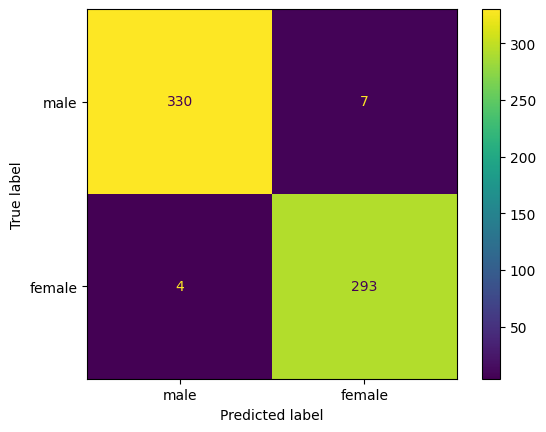

In [ ]:
# confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_default, display_labels=['male', 'female'])

In [ ]:
# Hyperparameter Tuning
estimator = SVC(random_state=42)

param_grid = {'kernel': ['rbf', 'poly'],
              'C': np.arange(0, 5),
              'gamma': np.arange(0, 2)}

grid_search = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1, verbose=4)
grid_search.fit(x_train_scaled, y_train)
best_parameters = grid_search.best_params_
print(best_parameters)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': np.int64(1), 'gamma': np.int64(1), 'kernel': 'poly'}


In [ ]:
# Creating the model with best parameters
final_model = SVC(**best_parameters, random_state=42)
final_model.fit(x_train_scaled, y_train)
print("Final Training Score:", round(final_model.score(x_train_scaled, y_train)*100,2), '%')

Final Training Score: 100.0 %


In [ ]:
# Creating the model with best parameters
final_model = SVC(**best_parameters, random_state=42)
final_model.fit(x_train_scaled, y_train)
print("Final Training Score:", round(final_model.score(x_train_scaled, y_train)*100,2), '%')

Final Training Score: 100.0 %


In [ ]:
# Confusion matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

NameError: name 'y_pred' is not defined